Linear regression house price prediction with keras.

In [ ]:
#import important libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#load dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.boston_housing.load_data(path='boston_housing',test_split=0.20,seed=113)

57026/57026 [==============================] - 0s 0us/step


In [ ]:
#check data existance
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
#scale third column
min_max_scaler=MinMaxScaler()
min_max_scaler.fit(x_train)
x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

In [ ]:
#create our model
model=Sequential(name='BostonHousingPrices')
model.add(Dense(100,input_dim=13,activation='relu',name='Hidden-1'))
model.add(Dense(100,input_dim=13,activation='relu',name='Hidden-2'))
model.add(Dense(1,activation='linear',name='output'))

In [ ]:
#compile model
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [ ]:
#fit model
history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 1s 24ms/step - loss: 545.7330 - mae: 21.4655 - val_loss: 566.1516 - val_mae: 21.8961
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 460.9417 - mae: 19.2729 - val_loss: 458.4109 - val_mae: 19.1787
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 353.6865 - mae: 16.1249 - val_loss: 329.7639 - val_mae: 15.3071
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 245.9568 - mae: 12.5773 - val_loss: 227.9987 - val_mae: 12.0658
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 170.5639 - mae: 10.0146 - val_loss: 162.7543 - val_mae: 9.9728
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 134.1351 - mae: 8.8062 - val_loss: 137.8492 - val_mae: 9.0558
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 115.6236 - mae: 8.0616 - val_loss: 116.4963 - val_mae: 8.1652
Epoch 8/50
11/11 [==============================] - 

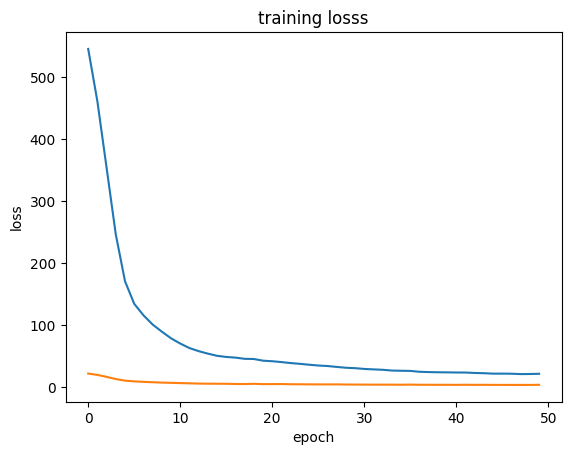

In [ ]:
#plotting our results
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.title('training losss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#evaluation model
results=model.evaluate(x_test,y_test)
for i in range (len(results)):

    print(f'{model.metrics_names[i]}-->{results[i]}')

4/4 [==============================] - 0s 4ms/step - loss: 24.3065 - mae: 3.5182
loss-->24.30651092529297
mae-->3.518204689025879


In [ ]:
#prediction
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 6ms/step


In [ ]:

#print y predict and y test
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 8.62  7.2 ]
 [17.94 18.8 ]
 [19.96 19.  ]
 [30.84 27.  ]
 [23.13 22.2 ]
 [18.05 24.5 ]
 [28.7  31.2 ]
 [23.03 22.9 ]
 [17.1  20.5 ]
 [20.73 23.2 ]
 [13.27 18.6 ]
 [17.64 14.5 ]
 [16.3  17.8 ]
 [35.01 50.  ]
 [15.44 20.8 ]
 [19.44 24.3 ]
 [22.04 24.2 ]
 [20.06 19.8 ]
 [18.37 19.1 ]
 [26.17 22.7 ]
 [10.78 12.  ]
 [11.08 10.2 ]
 [19.13 20.  ]
 [12.61 18.5 ]
 [20.57 20.9 ]
 [21.59 23.  ]
 [31.92 27.5 ]
 [27.28 30.1 ]
 [11.01  9.5 ]
 [19.3  22.  ]
 [21.14 21.2 ]
 [13.69 14.1 ]
 [34.62 33.1 ]
 [20.53 23.4 ]
 [16.32 20.1 ]
 [ 7.8   7.4 ]
 [14.47 15.4 ]
 [16.73 23.8 ]
 [17.91 20.1 ]
 [27.26 24.5 ]
 [24.85 33.  ]
 [25.88 28.4 ]
 [17.33 14.1 ]
 [33.53 46.7 ]
 [29.64 32.5 ]
 [21.27 29.6 ]
 [28.02 28.4 ]
 [15.94 19.8 ]
 [23.82 20.2 ]
 [21.44 25.  ]
 [31.05 35.4 ]
 [15.93 20.3 ]
 [10.99  9.7 ]
 [13.51 14.5 ]
 [32.7  34.9 ]
 [26.15 26.6 ]
 [16.36  7.2 ]
 [39.32 50.  ]
 [35.55 32.4 ]
 [23.57 21.6 ]
 [24.15 29.8 ]
 [19.45 13.1 ]
 [14.85 27.5 ]
 [19.37 21.2 ]
 [23.83 23.1 ]
 [23.45 21.9 ]
 [15.83 13

In [ ]:

#show how out of our model is near to out of target
print((np.mean(y_pred - y_test))**2)

1.4218276090643331


In [ ]:

#print array of output of our model
print((np.array(y_pred - y_test))**2)

[[2.00e+00 1.04e+02 1.08e+02 ... 1.71e+03 3.27e+02 2.68e+02]
 [1.15e+02 7.38e-01 1.12e+00 ... 1.03e+03 7.67e+01 4.98e+01]
 [1.63e+02 1.36e+00 9.31e-01 ... 9.02e+02 4.54e+01 2.54e+01]
 ...
 [1.19e+03 5.22e+02 5.13e+02 ... 6.98e+01 2.23e+02 2.77e+02]
 [6.68e+02 2.03e+02 1.97e+02 ... 2.88e+02 4.02e+01 6.46e+01]
 [1.59e+02 1.06e+00 6.85e-01 ... 9.10e+02 4.72e+01 2.68e+01]]
